In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
def draw(event, x, y, flags, param):
    global drawing, ix, iy, img_copy, mask

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img_copy, (ix, iy), (x, y), (0, 0, 255), 2)
            cv2.line(mask, (ix, iy), (x, y), (255, 255, 255), 2)
            ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(img_copy, (ix, iy), (x, y), (0, 0, 255), 2)
        cv2.line(mask, (ix, iy), (x, y), (255, 255, 255), 2)
        cv2.fillPoly(mask, [pts], (255,255,255))
        img_masked = cv2.bitwise_and(img, mask)
        cv2.imshow('cropped image', img_masked[y:y+h, x:x+w])

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
img_copy = img.copy()
mask = np.zeros_like(img)
drawing = False
while True:
    cv2.imshow('image', img_copy)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img_copy = img.copy()
        mask = np.zeros_like(img)

# Get the contours of the drawn region
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_mask, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(cnt)

# Crop the selected region
img_cropped = img[y:y+h, x:x+w]

# Show the cropped image
cv2.imshow('cropped image', img_cropped)
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()


NameError: name 'pts' is not defined

In [8]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
def draw(event, x, y, flags, param):
    global drawing, ix, iy, img_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img_copy, (ix, iy), (x, y), (0, 0, 255), 2)
            ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(img_copy, (ix, iy), (x, y), (0, 0, 255), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
img_copy = img.copy()
drawing = False
while True:
    cv2.imshow('image', img_copy)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img_copy = img.copy()

# Crop the selected region
gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# create a mask of zeros with same shape as the image
mask = np.zeros_like(img[:,:,0])

# draw the contour on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)

# apply the mask to the original image
cropped_img = cv2.bitwise_and(img, img, mask=mask)

# show the cropped image
cv2.imshow('cropped image', cropped_img)
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()


In [10]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
def draw(event, x, y, flags, param):
    global drawing, ix, iy, img_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img_copy, (ix, iy), (x, y), (0, 0, 255), 2)
            ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(img_copy, (ix, iy), (x, y), (0, 0, 255), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
img_copy = img.copy()
drawing = False
while True:
    cv2.imshow('image', img_copy)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img_copy = img.copy()

# Crop the selected region
gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
crop_img = cv2.bitwise_and(img, mask)

# Find the bounding box of the user-drawn area
x, y, w, h = cv2.boundingRect(contours[0])
crop_img = crop_img[y:y+h, x:x+w]

cv2.imshow('cropped image', crop_img)
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()


In [4]:
import cv2
import numpy as np
import os

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
drawing = False
points = []
contours = []
def draw(event, x, y, flags, param):
    global drawing, points, img, contours

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x, y)]

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, points[-1], (x, y), (0, 0, 255), 2)
            points.append((x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append((x, y))
        contour = np.array(points)
        contours.append(contour)
        cv2.drawContours(img, [contour], 0, (0, 255, 0), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img = cv2.imread('Entrenamiento2.jpg')
        points = []
        contours = []

# Segment the selected regions and save as separate images
for i, contour in enumerate(contours):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    result = cv2.bitwise_and(img, img, mask=mask)
    x, y, w, h = cv2.boundingRect(contour)
    result = result[y:y+h, x:x+w]
    cv2.imwrite(f"output_image_{i+1}.jpg", result)

# Close all windows
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import os

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
drawing = False
points = []
contours = []
def draw(event, x, y, flags, param):
    global drawing, points, img, contours

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x, y)]

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, points[-1], (x, y), (0, 0, 255), 2)
            points.append((x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append((x, y))
        contour = np.array(points)
        contours.append(contour)
        cv2.drawContours(img, [contour], 0, (0, 255, 0), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img = cv2.imread('Entrenamiento2.jpg')
        points = []
        contours = []

# Segment the selected regions and save as separate images
for i, contour in enumerate(contours):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    result = cv2.bitwise_and(img, img, mask=mask)
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = result[y:y+h, x:x+w]
    contour = contour - contour.min(axis=0)
    mask = np.zeros(cropped_image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
    cv2.imwrite(f"output_image_{i+1}.jpg", masked_cropped_image)

# Close all windows
cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np
import os

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
drawing = False
points = []
contours = []
def draw(event, x, y, flags, param):
    global drawing, points, img, contours

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x, y)]

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, points[-1], (x, y), (0, 0, 255), 2)
            points.append((x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append((x, y))
        contour = np.array(points)
        contours.append(contour)
        cv2.drawContours(img, [contour], 0, (0, 0, 0), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img = cv2.imread('Entrenamiento2.jpg')
        points = []
        contours = []

# Segment the selected regions and save as separate images
for i, contour in enumerate(contours):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    result = cv2.bitwise_and(img, img, mask=mask)
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = result[y:y+h, x:x+w]
    contour = contour - contour.min(axis=0)
    mask = np.zeros(cropped_image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
    cv2.imwrite(f"output_image_{i+1}.jpg", masked_cropped_image)

# Close all windows
cv2.destroyAllWindows()


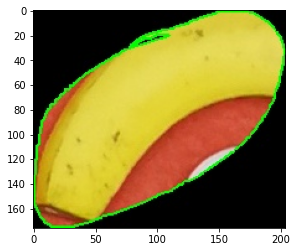

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
imgP1=mpimg.imread('output_image_1.jpg') 
imgplotP1 = plt.imshow(imgP1)


In [1]:
import cv2
import numpy as np
import os

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
drawing = False
points = []
contours = []
def draw(event, x, y, flags, param):
    global drawing, points, img, contours

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x, y)]

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, points[-1], (x, y), (0, 0, 255), 2)
            points.append((x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append((x, y))
        contour = np.array(points)
        contours.append(contour)
        cv2.drawContours(img, [contour], 0, (0, 0, 0), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img = cv2.imread('Entrenamiento2.jpg')
        points = []
        contours = []

# Segment the selected regions and save as separate images
for i, contour in enumerate(contours):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    result = cv2.bitwise_and(img, img, mask=mask)
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = result[y:y+h, x:x+w]
    contour = contour - contour.min(axis=0)
    mask = np.zeros(cropped_image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
    _, alpha = cv2.threshold(cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
    b, g, r = cv2.split(masked_cropped_image)
    rgba = [b, g, r, alpha]
    final_image = cv2.merge(rgba, 4)
    cv2.imwrite(f"output_image_{i+1}.png", final_image)

# Close all windows
cv2.destroyAllWindows()


error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x981fb336::Set<1,-1,-1>,struct cv::impl::A0x981fb336::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

In [7]:
import cv2
import numpy as np
import os

# Load the image in color mode
img = cv2.imread('Entrenamiento2.jpg', cv2.IMREAD_COLOR)

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
drawing = False
points = []
contours = []
def draw(event, x, y, flags, param):
    global drawing, points, img, contours

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x, y)]

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, points[-1], (x, y), (0, 0, 255), 2)
            points.append((x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append((x, y))
        contour = np.array(points)
        contours.append(contour)
        cv2.drawContours(img, [contour], 0, (0, 0, 0), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img = cv2.imread('Entrenamiento2.jpg', cv2.IMREAD_COLOR)
        points = []
        contours = []

# Segment the selected regions and save as separate images
for i, contour in enumerate(contours):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    result = cv2.bitwise_and(img, img, mask=mask)
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = result[y:y+h, x:x+w]
    contour = contour - contour.min(axis=0)
    mask = np.zeros(cropped_image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255,-1)
    masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
    cv2.imwrite(f"output_image_{i+1}.jpg", masked_cropped_image)

# Close all windows
cv2.destroyAllWindows()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\a

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\andre\appdata\local\programs\python\python37\lib\asyncio\selector_events.py", line 125, in _read_from_self
 

In [1]:
#WORKING V1

import cv2
import numpy as np
import os

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
drawing = False
points = []
contours = []
def draw(event, x, y, flags, param):
    global drawing, points, img, contours

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x, y)]

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, points[-1], (x, y), (0, 0, 255), 2)
            points.append((x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append((x, y))
        contour = np.array(points)
        contours.append(contour)
        cv2.drawContours(img, [contour], 0, (0, 0, 0), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img = cv2.imread('Entrenamiento2.jpg')
        points = []
        contours = []

# Segment the selected regions and save as separate images
for i, contour in enumerate(contours):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    result = cv2.bitwise_and(img, img, mask=mask)
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = result[y:y+h, x:x+w]
    
    # Create a mask with only the cropped area
    mask = np.zeros(cropped_image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour - contour.min(axis=0)], 0, 255, -1)
    
    # Apply the mask to the cropped image
    masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
    
    cv2.imwrite(f"output_image_{i+1}.png", masked_cropped_image)

# Close all windows
cv2.destroyAllWindows()


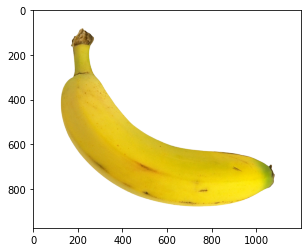

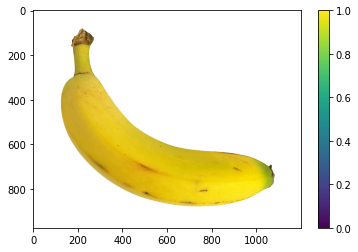

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('banana1.png')
imgplot = plt.imshow(img)
plt.show()

imgplot = plt.imshow(img)
plt.colorbar()


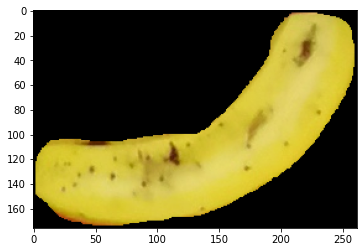

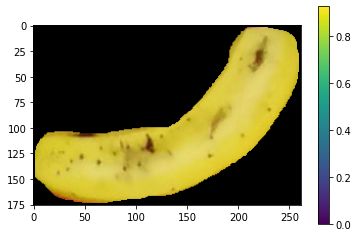

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('output_image_1.png')
imgplot = plt.imshow(img)
plt.show()

imgplot = plt.imshow(img)
plt.colorbar()


In [13]:
import numpy as np
from scipy.ndimage import gaussian_filter
from PIL import Image

# Load the image
img = np.array(Image.open('Entrenamiento1.jpg').convert('L'))

# Apply the Gaussian filter
sigma = 1.5
img_filtered = gaussian_filter(img, sigma)

# Save the filtered image
Image.fromarray(img_filtered.astype(np.uint8)).save('image_filtered.jpg')


In [2]:
# WORKING V2. Generates the cropped only png, and the binary mask.

import cv2
import numpy as np
import os


img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
drawing = False
points = []
contours = []
def draw(event, x, y, flags, param):
    global drawing, points, img, contours

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x, y)]

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, points[-1], (x, y), (0, 0, 255), 2)
            points.append((x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append((x, y))
        contour = np.array(points)
        contours.append(contour)
        cv2.drawContours(img, [contour], 0, (0, 0, 0), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img = cv2.imread('Entrenamiento2.jpg')
        points = []
        contours = []

# Segment the selected regions and save as separate images
for i, contour in enumerate(contours):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    result = cv2.bitwise_and(img, img, mask=mask)
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = result[y:y+h, x:x+w]
    
    # Create a mask with only the cropped area
    mask = np.zeros(cropped_image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour - contour.min(axis=0)], 0, 255, -1)
    
    # Apply the mask to the cropped image
    masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
    
    # Generate a binary mask for the cropped region
    binary_mask = np.zeros(cropped_image.shape[:2], np.uint8)
    cv2.drawContours(binary_mask, [contour - contour.min(axis=0)], 0, 255, -1)
    
    cv2.imwrite(f"output_image_{i+1}.png", masked_cropped_image)
    cv2.imwrite(f"output_mask_{i+1}.png", binary_mask)

# Close all windows
cv2.destroyAllWindows()


In [ ]:
# WORKING V3. CREACION DE MASCARA Y CROPPED 

import cv2
import numpy as np
import os

# Load the image
img = cv2.imread('Entrenamiento2.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Define the mouse event function
drawing = False
points = []
contours = []
def draw(event, x, y, flags, param):
    global drawing, points, img, contours

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x, y)]

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, points[-1], (x, y), (0, 0, 255), 2)
            points.append((x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append((x, y))
        contour = np.array(points)
        contours.append(contour)
        cv2.drawContours(img, [contour], 0, (0, 0, 0), 2)

# Bind the mouse event function to the window
cv2.setMouseCallback('image', draw)

# Display the image and wait for the user to draw on it
while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('r'):
        img = cv2.imread('Entrenamiento2.jpg')
        points = []
        contours = []

# Segment the selected regions and save as separate images
for i, contour in enumerate(contours):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    result = cv2.bitwise_and(img, img, mask=mask)
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = result[y:y+h, x:x+w]
    
    # Create a mask with only the cropped area
    mask = np.zeros(cropped_image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour - contour.min(axis=0)], 0, 255, -1)
    
    # Apply the mask to the cropped image
    masked_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
    
    # Create binary mask with cropped region as white
    binary_mask = np.zeros(img.shape[:2], np.uint8)
    binary_mask[y:y+h, x:x+w] = mask
    
    # Save cropped image and binary mask
    cv2.imwrite(f"output_image_{i+1}.png", masked_cropped_image)
    cv2.imwrite(f"output_mask_{i+1}.png", binary_mask)

# Close all windows
cv2.destroyAllWindows()
